# 2차 함수 모델 fiiting하기

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 생성하기

In [2]:
# function
f = lambda x: x**2 + 1.0/3.0 * x + 5.0

In [3]:
x = np.linspace(-20, 60, 50)
fx = f(x)

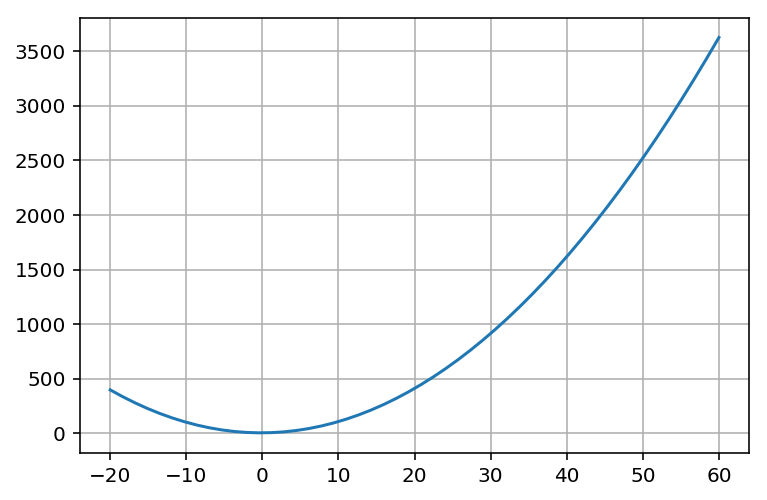

In [4]:
plt.plot(x,fx)
plt.grid()
plt.show()

In [5]:
np.random.seed(1)
y = fx + 500 * np.random.rand(len(x))

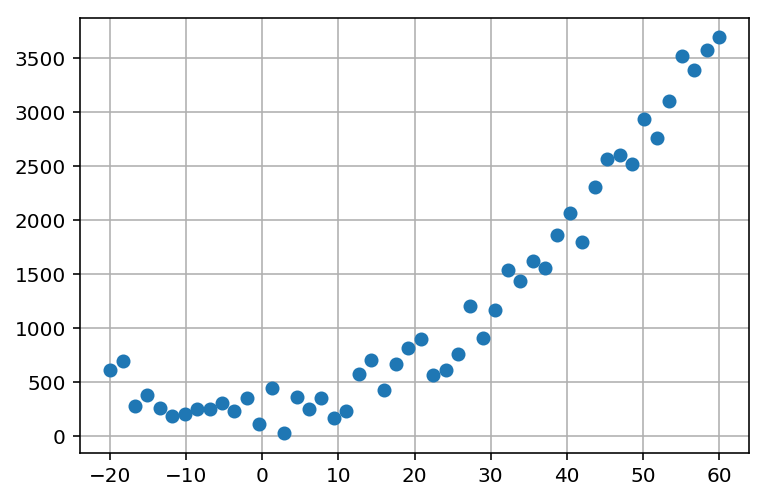

In [6]:
plt.plot(x,y, 'o')
plt.grid()
plt.show()

## 1. scipy.optimize 사용하기

참고링크 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

1. Define loss function
1. Call `minimize()`


\begin{equation}
loss(w) = \frac{1}{N}\sum_{i=1}^N |w_0 x_i^2 + w_1x_i + w_2 - y_i|^2
\end{equation}

In [7]:
# TODO 1-1
loss = lambda w: np.mean((w[0] * x ** 2 + w[1] * x + w[2] - y)**2)

In [8]:
# Remark 1-1 : np.mean() v.s. np.mean(np.sum())
# 다른 값을 계산합니다.
a = np.array([-1.0, 1.0, -1.0])
print(np.mean(np.square(a)))
print(np.mean(np.sum(np.square(a))))

1.0
3.0


In [9]:
from scipy.optimize import minimize
w0 = [0.0, 2.0, 1.0]
# TODO 1-2
res = minimize(loss, w0)
res

      fun: 21593.226967830597
 hess_inv: array([[ 7.87647749e-06, -1.57017134e-05, -7.17741667e-03],
       [-1.57017134e-05,  3.34710611e-05,  1.42649187e-02],
       [-7.17741667e-03,  1.42649187e-02,  7.04183857e+00]])
      jac: array([-0.09716797, -0.00170898,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 91
      nit: 8
     njev: 18
   status: 2
  success: False
        x: array([  0.93535196,   4.02326316, 226.43460408])

In [10]:
wopt = res.x
print(wopt)
y_pred = wopt[0] * x ** 2 + wopt[1] * x + wopt[2]

[  0.93535196   4.02326316 226.43460408]


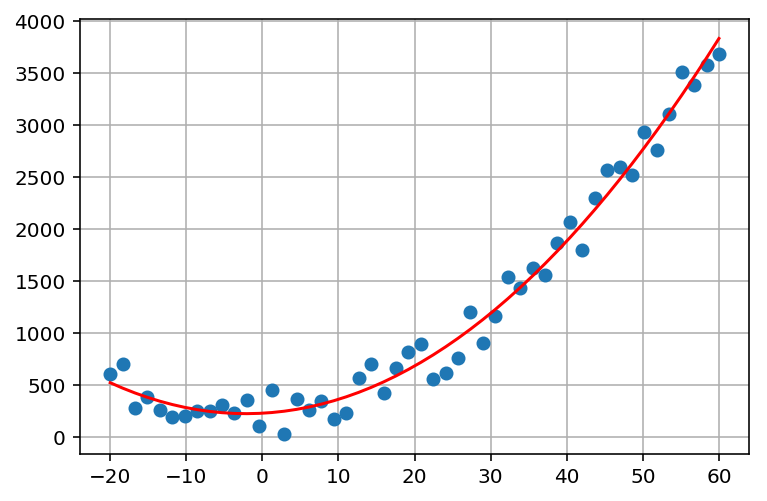

In [11]:
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.show()

## 2. Steepest Descent 사용하기
1. Define gradient
1. Write code for Steepest Descent 3d
1. Tune Parameters

\begin{equation}
loss(w) = \frac{1}{N}\sum_{i=1}^N |w_0 x_i^2 + w_1x_i + w_2 - y_i|^2
\end{equation}

\begin{equation}
\nabla loss(w) =
\frac{2}{N}\sum_{i=1}^N
(w_0 x_i^2 + w_1x_i + w_2 - y_i)
\begin{bmatrix}
x_i^2\\
x_i\\
1
\end{bmatrix}
\end{equation}

In [23]:
# TODO 2-1
def grad_f(w):
    val = np.zeros(len(w))
    for i in range(len(x)):
        er = w[0] * x[i] ** 2 + w[1] * x[i] + w[2] - y[i]
        val += er * np.array([x[i] ** 2, x[i], 1])
    val *= 2
    return val / len(x)

In [24]:
# TODO 2-2
def steepest_descent_3d(loss, grad_func, w0, learning_rate=0.01, MaxIter=10):
    for i in range(MaxIter):
        w0 += -learning_rate * grad_func(w0)
    return w0

In [25]:
# TODO 2-3
w_gd = steepest_descent_3d(loss, grad_f, w0, learning_rate=2E-7,MaxIter=7000)
# Remark 2-3 : learning_rate에 따라 매우 민감합니다.
print(w_gd  )

[1.06134805 2.98512203 1.35311147]


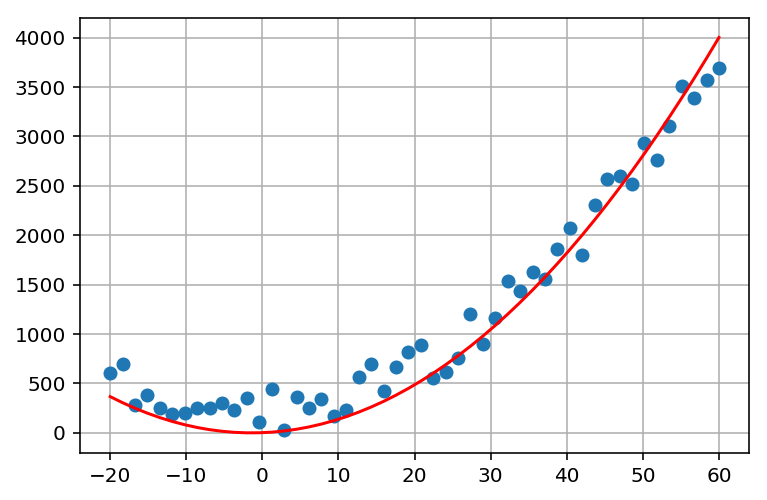

In [26]:
y_pred = w_gd[0] * x ** 2 + w_gd[1] * x + w_gd[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.show()

## 3. Newton Method 사용하기
1. Define gradient and hessian matrix
1. Write code for Newton method for 3d
1. Tune Parameter

\begin{equation}
loss(w) = \frac{1}{N}\sum_{i=1}^N |w_0 x_i^2 + w_1x_i + w_2 - y_i|^2
\end{equation}

\begin{equation}
\nabla loss(w) =
\frac{2}{N}\sum_{i=1}^N
(w_0 x_i^2 + w_1x_i + w_2 - y_i)
\begin{bmatrix}
x_i^2\\
x_i\\
1
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla^2 loss(w) =
\frac{2}{N}\sum_{i=1}^N
\begin{bmatrix}
x_i^4 & x_i^3 & x_i^2\\
x_i^3 & x_i^2 & x_i\\
x_i^2 & x_i & 1
\end{bmatrix}
\end{equation}

In [36]:
# TODO 3-1
def hessian_f(w):
    val = np.zeros((len(w),len(w)))
    for i in range(len(x)):
        val += 2. * np.array([[x[i]**4, x[i]**3, x[i]**2], [x[i]**3,x[i]**2,x[i]], [x[i]**2,x[i],1]])
    return val / len(x)

In [45]:
# TODO 3-2
def newton_descent_3d(loss, grad_func, hessian_func, w0, learning_rate=1, MaxIter=10):
    for i in range(MaxIter):
        grad = grad_func(w0)
        hess = hessian_func(w0)
        w0 += -learning_rate * np.linalg.solve(hess,grad)
    return w0

In [46]:
# Remark 3-2
A = np.array([[3., 0.],[0., 3.]])
b = np.array([1., 1.])
print(np.linalg.solve(A,b)) # 정확 & 빠름
print(np.matmul(np.linalg.inv(A) ,b)) # 부정확 & 느림

[0.33333333 0.33333333]
[0.33333333 0.33333333]


In [47]:
# TODO 3-3
w_nt = newton_descent_3d(loss, grad_f, hessian_f, w0, MaxIter=1)
# Remark 3-3 : Newton metho는 2차 함수의 최소값을 구할땐, 1번의 iteration으로 참값을 구할 수 있습니다.

[-1.81253740e+13 -3.65843113e+11 -8.45884490e+09]


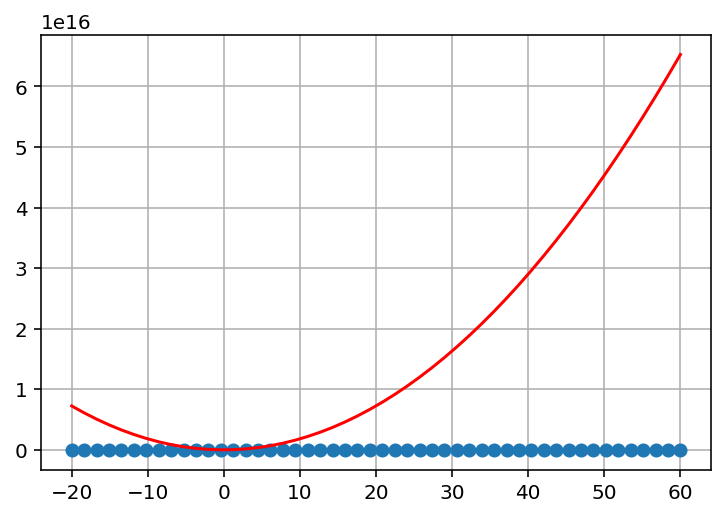

In [48]:
y_pred = w_nt[0] * x ** 2 + w_nt[1] * x + w_nt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.show()

## 4. 3가지 방법 비교

In [21]:
loss(wopt), loss(w_gd), loss(w_nt)

(21593.226967830597, 50142.655521489236, 21593.226967824554)

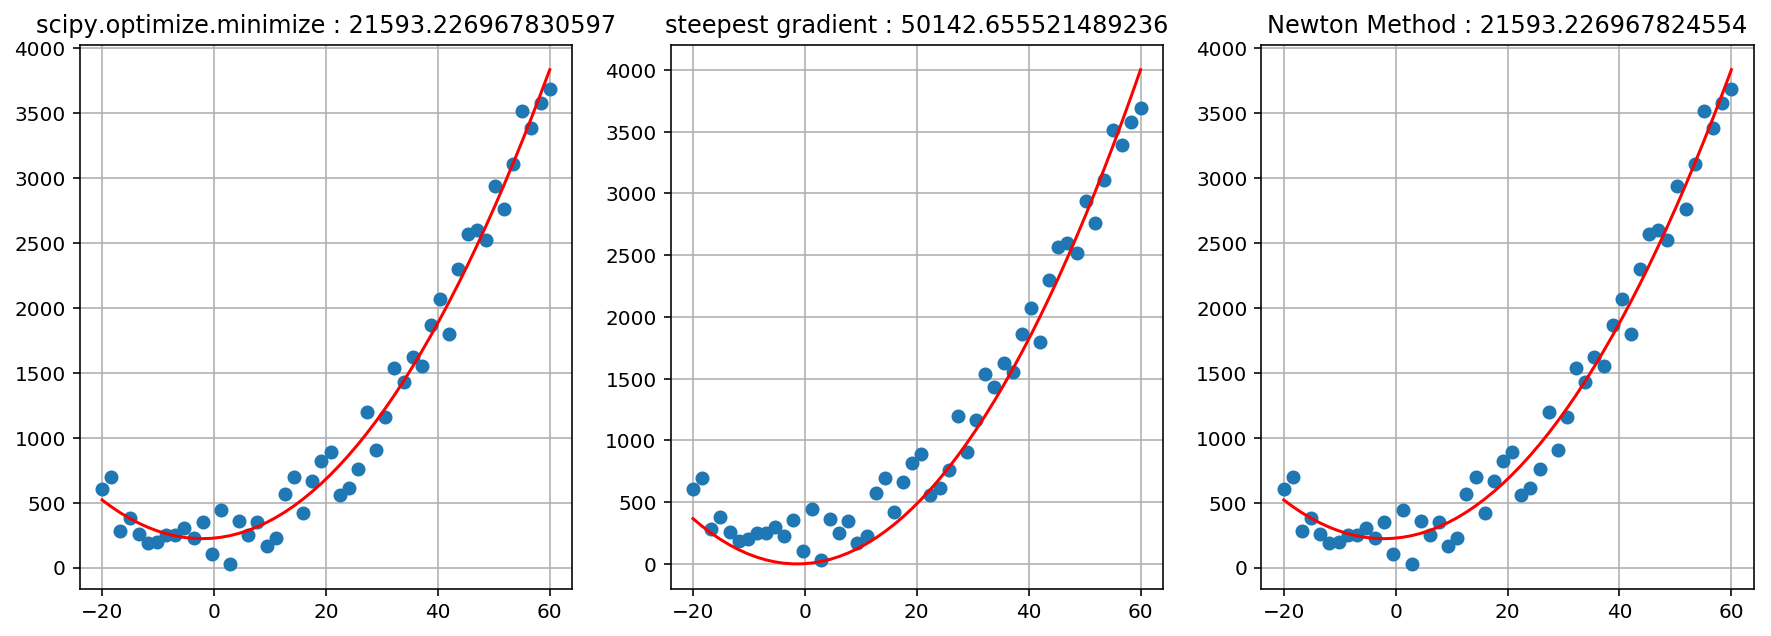

In [22]:
plt.subplots(3, figsize=(15,5))
plt.subplot(131)
y_pred = wopt[0] * x ** 2 + wopt[1] * x + wopt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('scipy.optimize.minimize : {0}'.format(loss(wopt)))

plt.subplot(132)
y_pred = w_gd[0] * x ** 2 + w_gd[1] * x + w_gd[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('steepest gradient : {0}'.format(loss(w_gd)))

plt.subplot(133)
y_pred = w_nt[0] * x ** 2 + w_nt[1] * x + w_nt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('Newton Method : {0}'.format(loss(w_nt)))
plt.show()